In [1]:
import numdifftools as nd
print(nd.__version__)

0.9.40


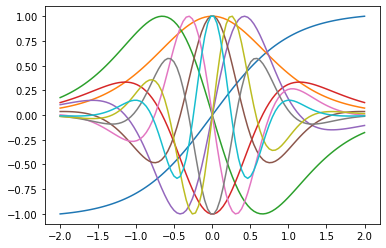

In [2]:
"checking purpose "

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(np.tanh, n=i)
    y = df(x)
    h = plt.plot(x, y/np.abs(y).max())

In [3]:
"Q 2"
import numdifftools as nd

def func(x):
	return -1*5*x**5+4*x**4-12*x**3+11*x**2-1*2*x+1

print(nd.Gradient(func)(-0.5),nd.Gradient(func)(0.5))
print("(-0.5 , 0.5) can be the initial level of uncertainity  ")
print("algo ends when interval goes below 10^-5(mentioned in question)")


a=-0.5
b=0.5
c=0
while (b-a)>=10**-5:
    c=(a+b)/2
    if nd.Gradient(func)(c)==0:
        print("x* =",end=" ")
        print(c)
        break
    elif nd.Gradient(func)(c)>0:
        b=c
    else:
        a=c
        
print("Algo ends")

print(f"x* = {c}, f(x*)={func(c)} , f'(x*)={nd.Gradient(func)(c)}")


-25.5625 0.43749999999999994
(-0.5 , 0.5) can be the initial level of uncertainity  
algo ends when interval goes below 10^-5(mentioned in question)
Algo ends
x* = 0.10985565185546875, f(x*)=0.8976329720282722 , f'(x*)=-6.197446620248809e-05


In [4]:
"Q 3"
import math
import numdifftools as nd

def func(x):
	return 2*math.sin(x)-(x**2)/10


print("Initial point taken as 2.5 and Epsilon as 10^-6")


x=2.5
while abs(nd.Gradient(func)(x))>10**-6:
    t=x
    x=t-(nd.Gradient(func)(t)/nd.Hessian(func)(t)[0])
    
print(f"x*= {x[0]} , f(x*)={func(x)[0]}")
print("")
print("Here an intresting thing can be observed that , here we wanted to find the max of f , and using newton method we found the maximum , One more thing we could do is find the minimum of -f that would give the same result")
print("So newton method doesnt necessorily converge to minima it will converge to nearest sttionary point")




Initial point taken as 2.5 and Epsilon as 10^-6
x*= 1.427551779301295 , f(x*)=1.7757256531474153

Here an intresting thing can be observed that , here we wanted to find the max of f , and using newton method we found the maximum , One more thing we could do is find the minimum of -f that would give the same result
So newton method doesnt necessorily converge to minima it will converge to nearest sttionary point


In [5]:
"Q 4"
import math
import numdifftools as nd

def func(x):
	return (11/546)*(x**6-38/364)*x**4+0.5*x**2


print("Initial point taken as 1.01 and Epsilon as 10^-6")


x=1.01
while abs(nd.Gradient(func)(x))>10**-6:
    t=x
    x=t-(nd.Gradient(func)(t)/nd.Hessian(func)(t)[0])
    
    print(f"x= {x[0]} , f(x)={func(x)[0]}")
    
    
print("Algo ends")
print(f"x*= {x[0]} , f(x*)={func(x)[0]}")


print("Yes , xk decreases to local minimum which is 0")



Initial point taken as 1.01 and Epsilon as 10^-6
x= 0.5941366115416455 , f(x)=0.17634750435606392
x= 0.011125551794058386 , f(x)=6.188891913795063e-05
x= -2.3170653279738773e-08 , f(x)=2.6843958670493456e-16
Algo ends
x*= -2.3170653279738773e-08 , f(x*)=2.6843958670493456e-16
Yes , xk decreases to local minimum which is 0


In [6]:
"Q 11"
import math
import numdifftools as nd

def func(x):
	return x**2+math.exp(-1*x)

"BISECTION"

a=-1
b=1
c=0
while (b-a)>=10**-6:
    c=(a+b)/2
    if nd.Gradient(func)(c)==0:
        print("x* =",end=" ")
        print(c)
        break
    elif nd.Gradient(func)(c)>0:
        b=c
    else:
        a=c
        
print(nd.Gradient(func)(-1),nd.Gradient(func)(1))
print("Initial level of uncertainity is (-1,1) and algo ends when interval goes below 10^-6")
print(f"BISECTION :   x* = {c}, f(x*)={func(c)} , f'(x*)={nd.Gradient(func)(c)}")

print("")
"NEWTON"

print("Initial point taken as 1 and Epsilon as 10^-6")


x=1
while abs(nd.Gradient(func)(x))>10**-6:
    t=x
    x=t-(nd.Gradient(func)(t)/nd.Hessian(func)(t)[0])
    
    
    
print(f"NEWTON :      x*= {x[0]} , f(x*)={func(x)[0]}")
print("")
print("Minima by both algo give same result (upto 6 decimal places precision) ")



-4.718281828459016 1.6321205588285734
Initial level of uncertainity is (-1,1) and algo ends when interval goes below 10^-6
BISECTION :   x* = 0.3517332077026367, f(x*)=0.827184026127867 , f'(x*)=-1.3613217990698306e-06

Initial point taken as 1 and Epsilon as 10^-6
NEWTON :      x*= 0.35173370481036287 , f(x*)=0.8271840261275244

Minima by both algo give same result (upto 6 decimal places precision) 


In [7]:
def func(x):
	return x[0]**2+math.exp(-1*x[1])

2*nd.Gradient(func)([1,2])

array([ 4.        , -0.27067057])

In [8]:
"Q 8 a steepest grad"
import math
import numdifftools as nd
import numpy as np
from scipy.optimize import line_search
from numpy import linalg as LA

def func(x):
    return 10*x[0]**2+x[1]**2

x=np.array([0.1,1])

while LA.norm(nd.Gradient(func)(x))>10**-5:
    alp=line_search(func, nd.Gradient(func), x, -1*nd.Gradient(func)(x))
    l=alp[0]*-1
    t=x.copy()
    
    x=np.add(t,l*nd.Gradient(func)(x))

print("x*= {x[0]},{x[1]} , f(x*)={func(x)}")
print(f"norm = {LA.norm(x)}")
    

    




x*= {x[0]},{x[1]} , f(x*)={func(x)}
norm = 3.6476978287886897e-06


In [9]:
"Q 8 b classic newton"
import math
import numdifftools as nd
from numpy import linalg as LA

def func(x):
	return 10*x[0]**2+x[1]**2


print("Initial point taken as 1.01 and Epsilon as 10^-6")


x=np.array([0.1,1])
while LA.norm(nd.Gradient(func)(x))>10**-5:
    t=x.copy()
    hinv=LA.inv(nd.Hessian(func)(t))
    x=np.add(t,np.matmul(hinv,(-1*nd.Gradient(func)(t))))
    

print("Algo ends")
print(f"x*= {x[0]},{x[1]} , f(x*)={func(x)}")



Initial point taken as 1.01 and Epsilon as 10^-6
Algo ends
x*= 0.0,3.3306690738754696e-16 , f(x*)=1.1093356479670479e-31


In [10]:
"Q 9 cordinate descent "
import numpy as np
def func(x):
	return 4*x[0]**2+(x[1])**2-2*x[0]*x[1]



x=np.array([-12,-1])
n=len(x)
ggg=0

while LA.norm(nd.Gradient(func)(x))>10**-2:
    for i in range(n):
        d=np.zeros(n)
        d[i]=1
        t=x.copy()
        
        alp=line_search(func, nd.Gradient(func), x, d)
        print(x)
        if alp[0]==None:
            continue
        x=np.add(t,alp[0]*d)
        print(x)
    ggg+=1


print("Algo ends")
print(f"x*= {x[0]},{x[1]} , f(x*)={func(x)}")









[-12  -1]
[-10.  -1.]
[-10.  -1.]
[-10.  -1.]
[-9. -1.]
[-9. -1.]
[-9. -1.]
[-8. -1.]
[-8. -1.]
[-8. -1.]
[-7. -1.]
[-7. -1.]
[-7. -1.]
[-6. -1.]
[-6. -1.]
[-6. -1.]
[-5. -1.]
[-5. -1.]
[-5. -1.]
[-4. -1.]
[-4. -1.]
[-4. -1.]
[-3. -1.]
[-3. -1.]
[-3. -1.]
[-2. -1.]
[-2. -1.]
[-2. -1.]
[-1. -1.]
[-1. -1.]
[-1. -1.]
[ 0. -1.]
[ 0. -1.]
[0. 0.]
Algo ends
x*= 0.0,0.0 , f(x*)=0.0


C:\Users\Public\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The 

In [11]:
d=np.ones(3)
3*d

array([3., 3., 3.])